## Lab - 08
### 1928343 - Kapil Sharma
### Lab Question - 01

In [1]:
#Importing the libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#Importing the dataset

df = pd.read_csv( "Social_Network_Ads.csv") 
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [3]:
#Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=0)

In [4]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [5]:
#Training KNN model in train set
from sklearn.neighbors import KNeighborsClassifier 
classifier = KNeighborsClassifier(n_neighbors = 5, metric ='minkowski', p =2)
classifier.fit(x_train,y_train)

KNeighborsClassifier()

In [6]:
#Predicting a new result set
print(classifier.predict(sc.transform([[30,87000]])))

[0]


In [7]:
#Predicting a test set results
y_pred = classifier.predict(x_test)

In [8]:
#Making the confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[64  4]
 [ 3 29]]


0.93

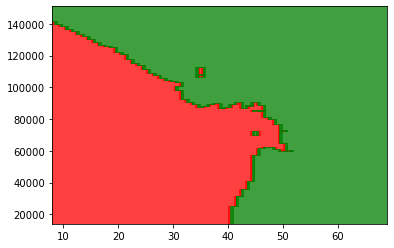

In [9]:
#Visualising the training set results
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(x_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
           alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.show()